# TMDB Movie Data Analysis
   Movies that cost over $100 million can still fail, why so? Movie lovers might have different interests.   
    A production company wants to analyze a movie dataset to identify what kinds of movies perform well in cinemas, which genres they belong to and so on. It will help thee company predict if a movie will be a commercial success, if the movie will be highly rated, etc.   
    To begin with, the management has asked Peter, a data analyst, to answer certain questions by carrying out the upcoming tasks.   
    You are required to help Peter write Python codes in a Python notebook to perform these tasks.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json

### Task 1: 
Load the movie dataset in the Python Notebook. Display the numbers of rows and columns in dataset. Display the titles and generes of the first 50 movies from the dataset.

In [2]:
df = pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
df.shape

(4803, 20)

In [4]:
df['genres'] = df['genres'].apply(json.loads)

# Access the values from the dictionaries within the DataFrame
df['genre_name'] = df['genres'].apply(lambda x: [i['name'] for i in x])

In [5]:
top_50 = df[['genre_name', 'title']].head(50)
top_50

,genre_name,title
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End
2,"[Action, Adventure, Crime]",Spectre
3,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises
4,"[Action, Adventure, Science Fiction]",John Carter
5,"[Fantasy, Action, Adventure]",Spider-Man 3
6,"[Animation, Family]",Tangled
7,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron
8,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince
9,"[Action, Adventure, Fantasy]",Batman v Superman: Dawn of Justice


###  Task 2:
Identify the columns that have null values and perform the null values treatment. (Choose the imputation method based on the type of data in the columns of interest)

In [6]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
genre_name                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
def separate_data_types(df):
    Categorical = []
    Continous = []
    
    for column in df.columns:
        if df[column].dtypes == object:
            Categorical.append(column)
        else:
            Continous.append(column)
    return Categorical, Continous
Categorical, Continous = separate_data_types(df)

table = [Categorical, Continous]
print(tabulate({'Categorical':Categorical, 'Continous':Continous}, headers=['Categorical', 'Continous']))

Categorical           Continous
--------------------  ------------
genres                budget
homepage              id
keywords              popularity
original_language     revenue
original_title        runtime
overview              vote_average
production_companies  vote_count
production_countries
release_date
spoken_languages
status
tagline
title
genre_name


In [9]:
def info_of_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")
    print(f"Total count of Missing values of {col} is: {df[col].isnull().sum()}")

In [10]:
def info_of_num(col):
    print(f"The Mean of the {col} is: {df[col].mean()}")
    print(f"The Median of the {col} is: {df[col].median()}")
    print(f"The Mode of the {col} is: {df[col].mode()[0]}")
    print(f"The Standard Deviation of the {col} is: {df[col].std()}")
    print(f"Number of Missing values in {col} is: {df[col].isnull().sum()}")

In [11]:
info_of_cat('homepage')

Unique values in homepage are: ['http://www.avatarmovie.com/'
 'http://disney.go.com/disneypictures/pirates/'
 'http://www.sonypictures.com/movies/spectre/' ...
 'http://www.primermovie.com'
 'http://www.hallmarkchannel.com/signedsealeddelivered'
 'http://shanghaicalling.com/']
Mode of homepage is: http://www.missionimpossible.com/
Total count of Missing values of homepage is: 3091


In [12]:
df['homepage'].fillna('http://www.missionimpossible.com/', inplace = True)

In [13]:
info_of_cat('homepage')

Unique values in homepage are: ['http://www.avatarmovie.com/'
 'http://disney.go.com/disneypictures/pirates/'
 'http://www.sonypictures.com/movies/spectre/' ...
 'http://www.primermovie.com'
 'http://www.hallmarkchannel.com/signedsealeddelivered'
 'http://shanghaicalling.com/']
Mode of homepage is: http://www.missionimpossible.com/
Total count of Missing values of homepage is: 0


In [14]:
info_of_cat('tagline')

Unique values in tagline are: ['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']
Mode of tagline is: Based on a true story.
Total count of Missing values of tagline is: 844


In [15]:
df['tagline'].fillna('Based on a true story.', inplace = True)

In [16]:
info_of_cat('tagline')

Unique values in tagline are: ['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']
Mode of tagline is: Based on a true story.
Total count of Missing values of tagline is: 0


In [17]:
info_of_cat('release_date')

Unique values in release_date are: ['10-12-2009' '19-05-2007' '26-10-2015' ... '26-12-2011' '13-10-2013'
 '03-05-2012']
Mode of release_date is: 01-01-2006
Total count of Missing values of release_date is: 1


In [18]:
df['release_date'].fillna('01-01-2006', inplace = True)

In [19]:
info_of_cat('release_date')

Unique values in release_date are: ['10-12-2009' '19-05-2007' '26-10-2015' ... '26-12-2011' '13-10-2013'
 '03-05-2012']
Mode of release_date is: 01-01-2006
Total count of Missing values of release_date is: 0


In [20]:
info_of_cat('overview')

Unique values in overview are: ['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'
 ...
 '"Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the past

In [21]:
df.dropna(subset = 'overview', inplace = True)

In [22]:
info_of_cat('overview')

Unique values in overview are: ['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'
 ...
 '"Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the past

In [23]:
info_of_num('runtime')

The Mean of the runtime is: 106.88083333333333
The Median of the runtime is: 103.0
The Mode of the runtime is: 90.0
The Standard Deviation of the runtime is: 22.61166330672514
Number of Missing values in runtime is: 0


In [24]:
df['runtime'].fillna(103.0, inplace = True)

In [25]:
info_of_num('runtime')

The Mean of the runtime is: 106.88083333333333
The Median of the runtime is: 103.0
The Mode of the runtime is: 90.0
The Standard Deviation of the runtime is: 22.61166330672514
Number of Missing values in runtime is: 0


In [26]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
genre_name              0
dtype: int64

### Task 3:
Display the movie categories that have a budget greater than $220,000.

In [27]:
B = df[['genre_name', 'budget']]
bud_cat = B[B.budget > 220000]
bud_cat.sort_values('budget', ascending = False)

,genre_name,budget
17,"[Adventure, Action, Fantasy]",380000000
1,"[Adventure, Fantasy, Action]",300000000
7,"[Action, Adventure, Science Fiction]",280000000
10,"[Adventure, Fantasy, Action, Science Fiction]",270000000
4,"[Action, Adventure, Science Fiction]",260000000
...,...,...
4631,"[Comedy, Drama, Romance]",250000
4661,"[Drama, Romance, War]",245000
4664,"[Drama, Action, Crime]",230000
4666,"[Foreign, Documentary]",225000


In [28]:
co1 = bud_cat['genre_name'].explode().value_counts(sort = True)
co1

Drama              1694
Comedy             1282
Thriller           1059
Action             1007
Adventure           716
Romance             663
Crime               588
Science Fiction     467
Family              408
Horror              384
Fantasy             373
Mystery             292
Animation           206
History             164
Music               133
War                 131
Western              65
Documentary          47
Foreign               7
TV Movie              3
Name: genre_name, dtype: int64

In [29]:
len(bud_cat)

3682

### Task 4:
Display the movie categories where the revenue is greater than $961,000,000.

In [30]:
R = df[['genre_name', 'revenue']]
rev_cat = R[R.revenue > 961000000]
rev_cat.sort_values('revenue', ascending = False)

,genre_name,revenue
0,"[Action, Adventure, Fantasy, Science Fiction]",2787965087
25,"[Drama, Romance, Thriller]",1845034188
16,"[Science Fiction, Action, Adventure]",1519557910
28,"[Action, Adventure, Science Fiction, Thriller]",1513528810
44,[Action],1506249360
7,"[Action, Adventure, Science Fiction]",1405403694
124,"[Animation, Adventure, Family]",1274219009
31,"[Action, Adventure, Science Fiction]",1215439994
546,"[Family, Animation, Adventure, Comedy]",1156730962
26,"[Adventure, Action, Science Fiction]",1153304495


In [31]:
co2 = rev_cat['genre_name'].explode().value_counts(sort = True)
co2

Adventure          18
Action             16
Fantasy             8
Science Fiction     8
Family              7
Thriller            5
Drama               4
Animation           4
Comedy              3
Crime               2
Romance             1
Name: genre_name, dtype: int64

In [32]:
len(rev_cat)

24

### Task 5:
In the dataset, there are some movies for which the budget and revenue columns have the value 0, which mean unknown values. Remove the rows with value 0 from both the budget and revenue columns.

In [33]:
df = df[(df.budget != 0)&(df.revenue != 0)]

In [34]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_name
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,[Comedy]
4788,12000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",http://www.missionimpossible.com/,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]",...,12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]"
4792,20000,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",http://www.missionimpossible.com/,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]",...,06-11-1997,99000,111.0,"[{""i

### Task 6.1:
List the top 10 movies with the highest revenues. 

In [35]:
df[['title', 'revenue']].sort_values('revenue', ascending = False).head(10)

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


### Task 6.2:
List the top 10 movies with the least budget.

In [36]:
df[['title', 'budget']].sort_values('budget', ascending = True).head(10)

,title,budget
4238,Modern Times,1
3611,A Farewell to Arms,4
3372,Split Second,7
3419,Bran Nue Dae,7
4608,The Prophecy,8
3131,Of Horses and Men,10
3137,Nurse 3-D,10
2933,F.I.S.T.,11
1912,Angela's Ashes,25
1771,The 51st State,28


### Task 7:
How are popularities of movies related with the movie budgets? Are they correlated or totally uncorrelated with each other? Write the interpretation of you analysis.

In [37]:
bud_pop = df[['budget', 'popularity']]

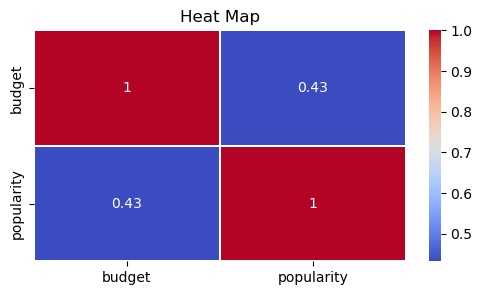

In [38]:
plt.figure(figsize=(6,3))
sns.heatmap(bud_pop.corr(), cbar=True, linewidths=0.1, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

In [39]:
corr = bud_pop['budget'].corr(bud_pop['popularity'])

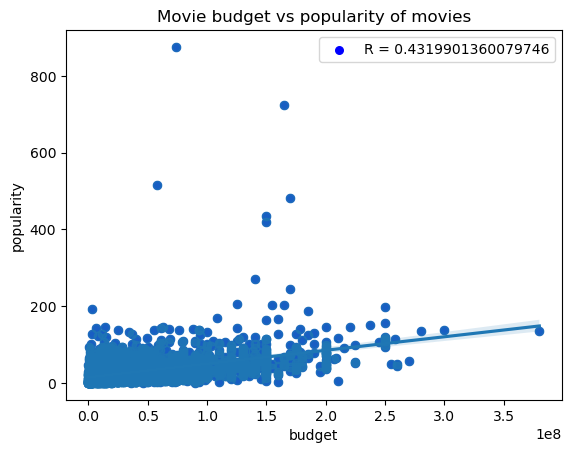

In [40]:
plt.scatter('budget', 'popularity', data=bud_pop, color='b', s=30, label = ("R = "+str(corr)))
sns.regplot(x='budget', y='popularity', data=bud_pop)
plt.title('Movie budget vs popularity of movies')
plt.xlabel("R = "+str(corr))
plt.xlabel('budget')
plt.ylabel('popularity')
plt.legend()
plt.show()

### Task 8:
Identify and Display the names of all production companies along with the number of times they appear in the dataset.

In [41]:
df['production_companies'] = df['production_companies'].apply(json.loads)

# Access the values from the dictionaries within the DataFrame
df['Company_name'] = df['production_companies'].apply(lambda x: [i['name'] for i in x])

In [42]:
company = df['Company_name'].explode().value_counts(sort = True)
company

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
HW Two                                      1
Unfinished Films                            1
Infinity Features Entertainment             1
British Columbia Film                       1
Daiei Studios                               1
Name: Company_name, Length: 3564, dtype: int64

### Task 9:
Display the names of the top 25 production companies based on the number of movies they have produced in descending order of the number of movies produced.

In [43]:
company.head(25)

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
Miramax Films                              67
DreamWorks SKG                             67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Canal+                                     48
Summit Entertainment                       48
Fox Searchlight Pictures          

### Task 10:
Sort the data in Descending order based on revenue and filter the top 500 movies.    
Find the measures of central tendency for the following columns using the filtered data:
1. budget
2. revenue
3. runtime   
Perform outlier analysis for the above three columns using box plots.

In [44]:
df2 = df[['title', 'revenue', 'budget', 'runtime']].sort_values('revenue', ascending=False).head(500)
df2

,title,revenue,budget,runtime
0,Avatar,2787965087,237000000,162.0
25,Titanic,1845034188,200000000,194.0
16,The Avengers,1519557910,220000000,143.0
28,Jurassic World,1513528810,150000000,124.0
44,Furious 7,1506249360,190000000,137.0
...,...,...,...,...
397,It's Complicated,219103655,85000000,121.0
1744,Knocked Up,219076518,30000000,129.0
698,The Prince of Egypt,218613188,70000000,99.0
717,Jack Reacher,218340595,60000000,130.0


In [45]:
df3 = df2[['revenue', 'budget', 'runtime']]

In [46]:
Mean = []
Median = []
Mode = []

for col in df3:
    Mean.append(df3[col].mean())             #Calculating the mean value and storing in the mean name list
    Median.append(df3[col].median())         #Calculating the median value and storing in the median name list
    Mode.append(st.mode(df3[col].mode()))    #Calculating the mode value and storing in the mode name list
    
row_head = ['Mean', 'Median', 'Mode']
col_names = ['revenue', 'budget', 'runtime']

#Creating a Data Frame with all the calculated Mean, Median and Mode of all companaies.
d_data = pd.DataFrame([Mean, Median, Mode], columns=col_names)
d_data.insert(0, 'Measures', row_head)
d_data

,Measures,revenue,budget,runtime
0,Mean,4.585776e+08,103193736.0,118.72
1,Median,3.630016e+08,95000000.0,116.00
2,Mode,2.177643e+08,150000000.0,115.00


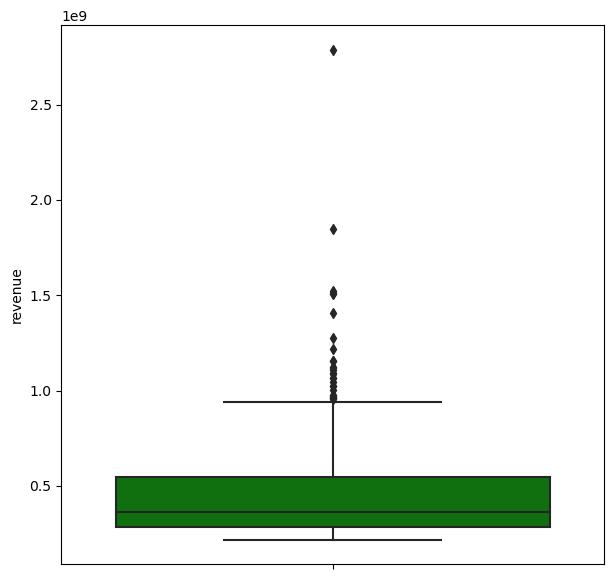

In [47]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['revenue'], color='g')
plt.show()

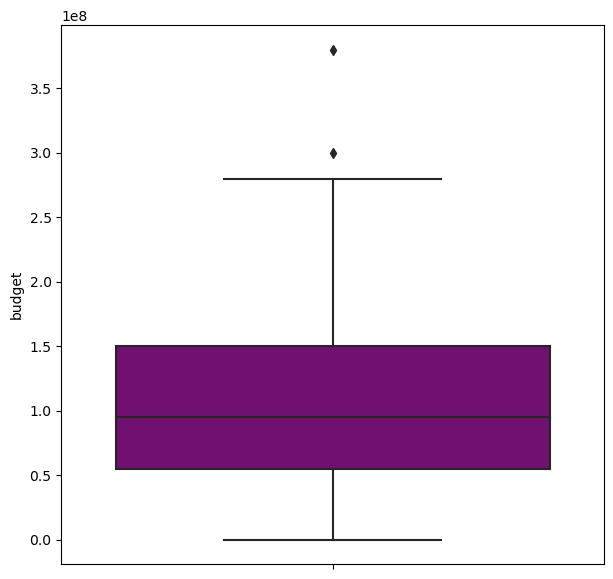

In [48]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['budget'], color='purple')
plt.show()

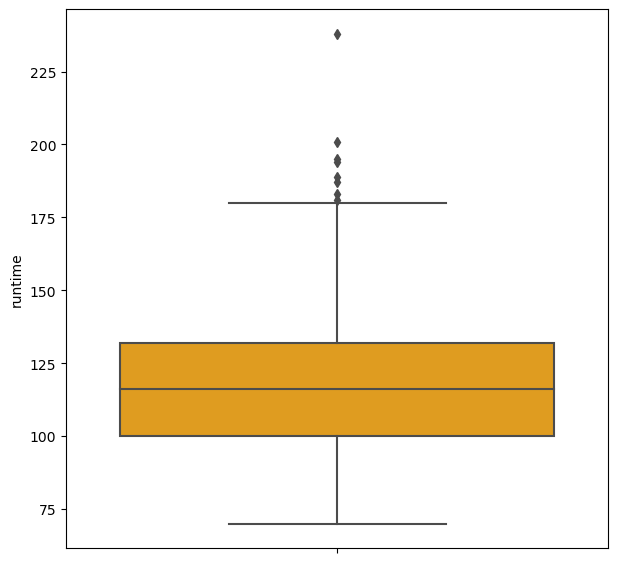

In [49]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['runtime'], color='orange')
plt.show()

In [50]:
x = df3[df3['revenue']>=0.6e+09].index
mean = df3['revenue'].mean()
for index in x:
    df3.loc[index, 'revenue'] = mean

In [51]:
x = df3[df3['budget']>=2.5e+08].index
mean = df3['budget'].mean()
for index in x:
    df3.loc[index, 'budget'] = mean

In [52]:
x = df3[df3['runtime']>=175].index
mean = df3['runtime'].mean()
for index in x:
    df3.loc[index, 'runtime'] = mean

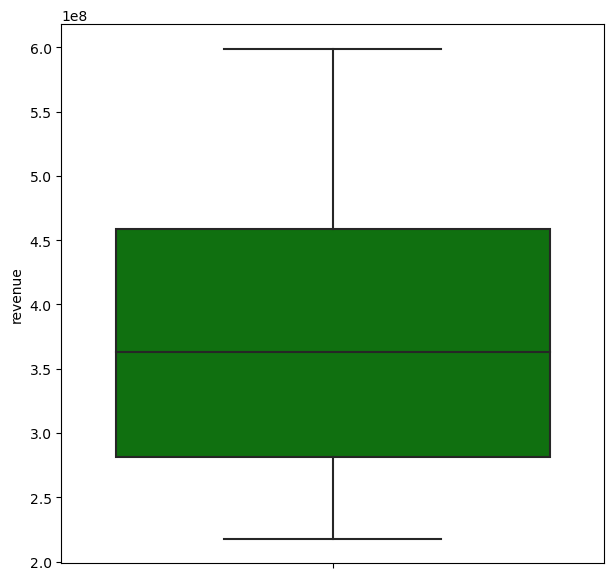

In [53]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['revenue'], color='g')
plt.show()

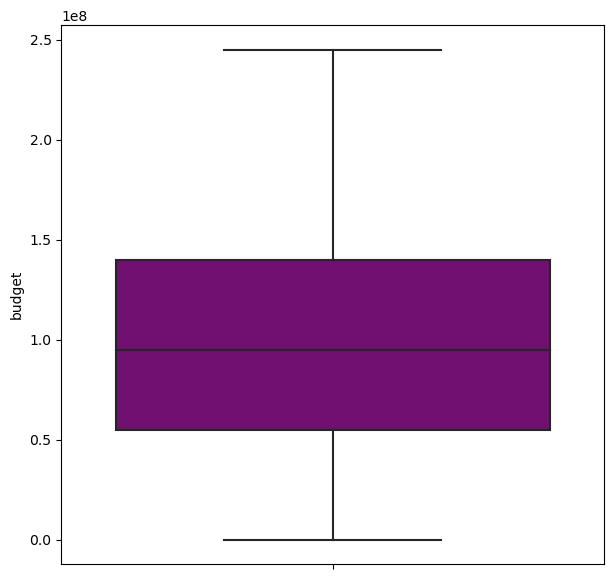

In [54]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['budget'], color='purple')
plt.show()

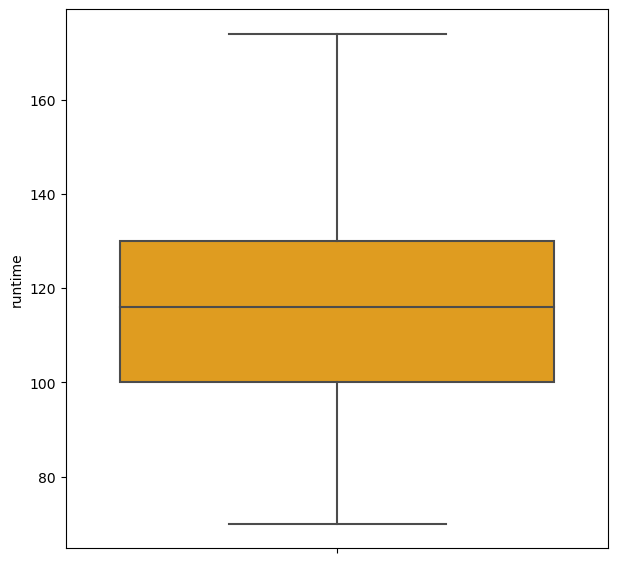

In [55]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(y = df3['runtime'], color='orange')
plt.show()

### Task 11:
Identify and Display the names of the movies along with their run times for those movies that have above average runtime, using the data from the previous task.

In [56]:
avg = df2['runtime'].mean()
avg

118.72

In [57]:
run = df2[['title', 'runtime']]

In [58]:
sort = run[(run.runtime > avg)]
sort.sort_values('runtime', ascending = False)

,title,runtime
3813,Gone with the Wind,238.0
329,The Lord of the Rings: The Return of the King,201.0
1818,Schindler's List,195.0
25,Titanic,194.0
690,The Green Mile,189.0
...,...,...
2668,Pretty Woman,119.0
245,Tomorrow Never Dies,119.0
2667,Fatal Attraction,119.0
249,Insurgent,119.0


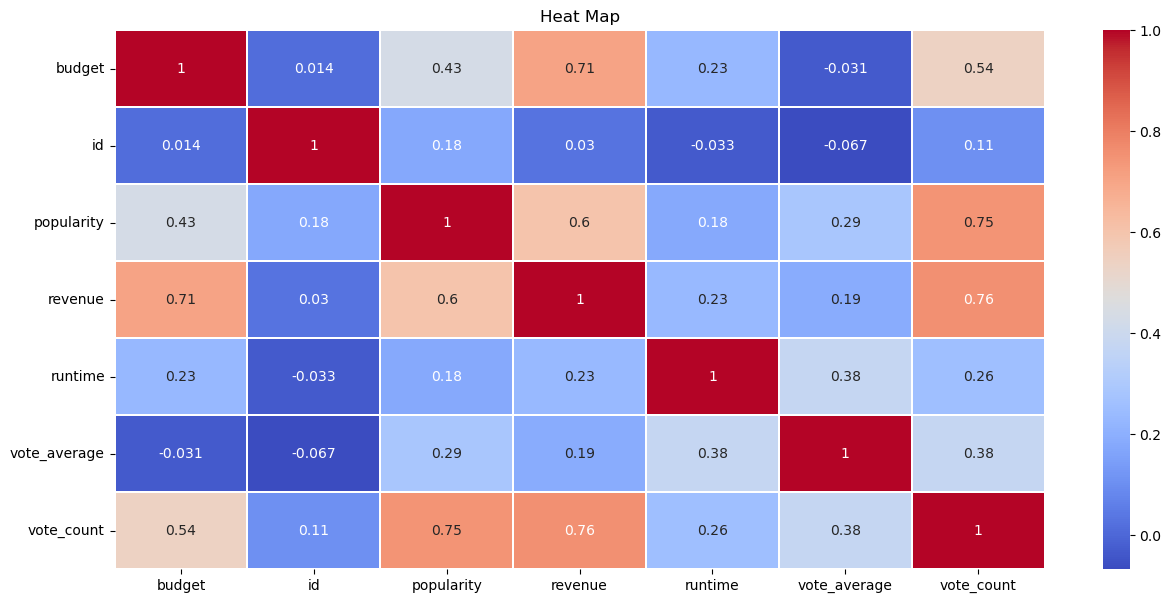

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cbar=True, linewidths=0.1, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

In [60]:
df[(df.title == 'Gone with the Wind')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_name,Company_name
3813,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.missionimpossible.com/,770,"[{""id"": 314, ""name"": ""life and death""}, {""id"":...",en,Gone with the Wind,An American classic in which a manipulative wo...,48.98255,"[{'name': 'Selznick International Pictures', '...",...,400176459,238.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The greatest romance of all time!,Gone with the Wind,7.7,970,"[Drama, Romance, War]","[Selznick International Pictures, Metro-Goldwy..."
